In [3]:
import keras
import time
import glob
import numpy as np
from PIL import Image
import tensorflow as tf
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras_vggface.vggface import VGGFace
from keras.models import Model, Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout

In [6]:
imgs = glob.glob("data/*.jpg")

In [27]:
imgs

array([], shape=(0, 4), dtype=float32)

In [8]:
faces_imgs = np.load("faces_imgs.npy")
faces_annot = np.load("faces_annot.npy")[0]

In [9]:
def get_face_id(img):
    faces = []
    for i in faces_imgs:
        if i[1] == img:
            faces.append(i[0])
    return np.array(faces)

In [10]:
def get_id_coord(img):
    W, H = Image.open(img).size
    coord = [] 
    ids = get_face_id(img)
    for i in ids:
        coord.append(faces_annot[int(i)])
    a = np.array(coord, dtype=np.float32).reshape(-1, 4)
    a = a[a[:,0].argsort()]
    a[:, 0] /= W 
    a[:, 1] /= H
    a[:, 2] /= H
    a[:, 3] /= W
    return a

In [11]:
K.set_learning_phase(1)
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.85)
sess = tf.Session()

X = tf.placeholder(dtype = tf.float32, shape = (1, None, None, 3))
Y = tf.placeholder(dtype = tf.float32, shape = (None, 5))

In [12]:
vgg = VGGFace(include_top=False, input_tensor = X, input_shape=(375, 500, 3))
for layer in vgg.layers:
    layer.trainable = False

In [13]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 375, 500, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 375, 500, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 375, 500, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 187, 250, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 187, 250, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 187, 250, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 93, 125, 128)      0         
__________

In [14]:
p1 = Conv2D(filters=1024, kernel_size=3, strides=1, padding='same')(vgg.get_layer(index=13).output)
p1 = BatchNormalization()(p1)
p1 = Activation('relu')(p1)
p2 = Conv2D(filters=1024, kernel_size=3, strides=1, padding='same')(vgg.get_layer(index=14).output)
p2 = BatchNormalization()(p2)
p2 = Activation('relu')(p2)

p101 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p1))
p102 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p1)
p102 = BatchNormalization()(p102)
# p102 = Activation('relu')(p102)
# p102 = Activation('sigmoid')(p102)
p201 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p2))
p202 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p2)
p202 = BatchNormalization()(p202)
# p202 = Activation('relu')(p202)
# p202 = Activation('sigmoid')(p202)


# DownSample

p1 = MaxPool2D(strides= 2)(p1)
p2 = MaxPool2D(strides= 2)(p2)

p1 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(p1)
p1 = BatchNormalization()(p1)
p1 = Activation('relu')(p1)
p2 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(p2)
p2 = BatchNormalization()(p2)
p2 = Activation('relu')(p2)

p111 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p1))
p112 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p1)
p112 = BatchNormalization()(p112)
# p112 = Activation('relu')(p112)
# p112 = Activation('sigmoid')(p112)
p211 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p2))
p212 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p2)
p212 = BatchNormalization()(p212)
# p212 = Activation('relu')(p212)
# p212 = Activation('sigmoid')(p212)

# DownSample

p1 = MaxPool2D(strides= 2)(p1)
p2 = MaxPool2D(strides= 2)(p2)

p1 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(p1)
p1 = BatchNormalization()(p1)
p1 = Activation('relu')(p1)
p2 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(p2)
p2 = BatchNormalization()(p2)
p2 = Activation('relu')(p2)

p121 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p1))
p122 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p1)
p122 = BatchNormalization()(p122)
# p122 = Activation('relu')(p122)
# p122 = Activation('sigmoid')(p122)
p221 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p2))
p222 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p2)
p222 = BatchNormalization()(p222)
# p222 = Activation('relu')(p222)
# p222 = Activation('sigmoid')(p222)

# DownSample

p1 = MaxPool2D(strides= 2)(p1)
p2 = MaxPool2D(strides= 2)(p2)

p1 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(p1)
p1 = BatchNormalization()(p1)
p1 = Activation('relu')(p1)
p2 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(p2)
p2 = BatchNormalization()(p2)
p2 = Activation('relu')(p2)

p131 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p1))
p132 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p1)
p132 = BatchNormalization()(p132)
# p132 = Activation('relu')(p132)
# p132 = Activation('sigmoid')(p132)
p231 = K.sigmoid(Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(p2))
p232 = Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(p2)
p232 = BatchNormalization()(p232)
# p232 = Activation('relu')(p232)
# p232 = Activation('sigmoid')(p232)

# Combine All Predictions

p102 = K.concatenate(tensors=[p101, p102], axis = -1)
p202 = K.concatenate(tensors=[p201, p202], axis = -1)

p112 = K.concatenate(tensors=[p111, p112], axis = -1)
p212 = K.concatenate(tensors=[p211, p212], axis = -1)

p122 = K.concatenate(tensors=[p121, p122], axis = -1)
p222 = K.concatenate(tensors=[p221, p222], axis = -1)

p132 = K.concatenate(tensors=[p131, p132], axis = -1)
p232 = K.concatenate(tensors=[p231, p232], axis = -1)

In [15]:
pred = [K.reshape(p102, (-1, 5)),
        K.reshape(p202, (-1, 5)),
        K.reshape(p112, (-1, 5)),
        K.reshape(p212, (-1, 5)),
        K.reshape(p122, (-1, 5)),
        K.reshape(p222, (-1, 5)),
        K.reshape(p132, (-1, 5)),
        K.reshape(p232, (-1, 5)),
       ]

In [16]:
pred = K.concatenate(pred, axis = 0)

In [17]:
def NMS(boxes = pred):    
    Z0 = K.tf.image.non_max_suppression(boxes=K.reshape(boxes[:, 1:], (-1, 4)), scores=K.reshape(boxes[:, 0], (-1, )),
                                        max_output_size=20, iou_threshold=0.55)
    A = K.reshape(K.tf.gather_nd(boxes, K.reshape(Z0, (-1, 1))), (-1, 5))
    return A

In [18]:
def loss(Y, y, a=0.8):
    if tf.size(Y) != tf.size(y):
        n = tf.truncatediv(tf.size(Y),  K.constant(value = 5, dtype=tf.int32))
        y_ = y[:n]
        
    softMax = K.mean(-(Y[:, 0] * K.log(y_[:, 0]) + (1 - Y[:, 0]) * K.log(1 - y_[:, 0])))
    mse = K.mean(K.square(Y[:, 1:] - y_[:, 1:]))
    return softMax + 1.5 * mse

In [19]:
bbox = NMS()

In [20]:
cost = loss(Y, bbox)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [21]:
opt = tf.train.AdamOptimizer(learning_rate=0.000075)
train_ = opt.minimize(cost)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [22]:
sess.run(tf.global_variables_initializer())

In [25]:
def train(epochs = 10):
    for e in range(epochs):
        for img in imgs:
            _, L = sess.run([train_, cost], feed_dict={X: np.expand_dims(np.array(Image.open(img), dtype = np.float32)/255, axis=0), Y: np.array(np.append([1], get_id_coord(img)), dtype = np.float32)})       
        if e % 50 == 0:
            print("epoch {}, iter {} , loss {}".format(e, 0 , L))

In [26]:
train(epochs = 25000)

ValueError: Cannot feed value of shape (1,) for Tensor 'Placeholder_1:0', which has shape '(?, 5)'

In [106]:
d = sess.run(bbox, feed_dict={X: np.expand_dims(np.array(Image.open(imgs[1]))/255, axis=0)})

In [107]:
d[1]

array([ 0.90736467,  1.3879048 ,  1.3609929 , -0.9225632 , -1.0526922 ],
      dtype=float32)

In [108]:
def plot_box(box, img):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from PIL import Image
    %matplotlib inline
    p, x, y, h, w = box
    im = np.array(Image.open(img), dtype=np.uint8)
    W, H = Image.open(img).size
    fig,ax = plt.subplots(1)

    ax.imshow(im)

    rect = patches.Rectangle((x*W,y*H),w*W,h*H,linewidth=1,edgecolor='r',facecolor='none')

    ax.add_patch(rect)

    plt.show()

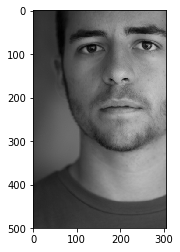

In [109]:
plot_box(np.abs(d[1]), imgs[1])